In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Neural Networks
NN are not a recent innovation in ML (indeed NN's are often little more than a bunch of Logistic Regression classifiers working together) but recent advances in the architecture of these networks are what have made them useful (read more about Convolutional & Recurrent NN's  for details). Today we will be talking about the simplest possible implementation of a NN the "Feed Forward" NN. 

Remember from Logistic Regression, our binary classifier worked by first calculating the dot product between a feature vector and a weight vector $z=\sum_{i}^{n}\vec{X_{i}}\cdot\vec{w_{i}}$ and then transforming the $\pm\infty$ range of z to the range (0,1) via the logistic function $f(z)=\frac{1}{1+e^{-z}}$. Each neuron in a NN works in exactly the same way except different activation functions are typically used in the hidden layers for technical reasons. For the purposes of consistency in this discussion we continue using the logistic function anyway.

<img src="./figures/nn_1.png">

What makes a NN different is that the output value of the logistic function (now called an activation, $a=f(z)=\frac{1}{1+e^{-z}}$) can then be fed as inputs to another layer of artificial neurons.
<img src="./figures/nn_2.png">

### Feed forward!
The following equation describes the state of the system at the First hidden layer
$\left[ \begin{array}{cccc}
w_{1}^{1} & w_{1}^{2} & \ldots & w_{1}^{n} \\
w_{2}^{1} & w_{2}^{2} & \ldots & w_{2}^{n} \\
w_{3}^{1} & x_{3}^{2} & \ldots & x_{3}^{n} \\ \end{array} \right] \\$ 
$
\cdot \left[ \begin{array}{c}
a_{1}^{1}\\
a_{2}^{1}\\
\vdots\\
x_{n}^{1}
\end{array} \right]
$ 
$ =\left[ \begin{array}{c}
z_{1}^{2}\\
z_{2}^{2}\\
z_{3}^{2}
\end{array} \right]
$

Applying our activation function turns the $z^{2}_{1-3}$ values into an activation that can be feed to a new layer out outputs $a^{2}_{1-3}$ that an serve as inputs to yet another layer. Now

$$\left[ \begin{array}{c} w_{1}^{1} & w_{1}^{2} & w_{1}^{3} \end{array} \right] \cdot \left[ \begin{array}{c}
a_{1}^{2}\\
a_{2}^{2}\\
a_{3}^{2}
\end{array} \right] = z^{2}_{1}
$$

Apply our activation function and generate an output again and the model generates an output value (0,1), our NN prediction.

The same loss function we used for logistic regression will work for updating the weights on the output layer $$J(w) = -[y_{i}\cdot log(f(z_{1}^{2}) + (1-y_{i})\cdot log(1-f(z_{1}^{2}))]$$ but how can we find the optimal weights? Just like in logistic regression we need to find the values of w that find the minimum of our cost function (i.e. where $\frac{\delta J}{\delta w} = 0$).

### Back Propagation
The back propagation algorithm measures $\delta^{layer}_{a} = \frac{\delta J}{\delta w}$, the error at a given output layer owing to each adjustable weight w. Knowing this partial derivate will tell us how to adjust w to minimize cost (i.e. set the derivative of J with respect to w to zero).

To illustrate this, lets work though the change in the cost function of the output layer as function of the activation value $a_{1}=f(z_{1}) :$

Using the cost function J defined above we will recall from the chain rule $$ \frac{\delta J}{\delta w_{i}} = \frac{\delta J}{\delta f(z)} \cdot  \frac{\delta f(z)}{\delta z} \cdot  \frac{\delta z}{\delta w_{i}}$$

So lets just calulate all the partial deriviatives in turn from left to right!

$$J = -[y_{i}\cdot log(f(z_{1}) + (1-y_{i})\cdot log(1-f(z_{1}))]$$

$$\frac{\delta J}{\delta f(z_{1})} = -[\frac{y_i}{f(z_{1})} + \frac{1-y_{i}}{1-f(z_{1})}] $$

(* We are using natural logs here. Using $log_{10}$ will give the same result but with a constant multiplier out-front we can safely ignore.) Next we need to find the change in the activation function $f(z_{1})$ with respect to $z_{1}$:

$$f(z_{1})=\frac{1}{1+e^{-z_{1}}}$$


$$\frac{\delta f(z_{1})}{\delta z_{1}} = f(z_{1})\cdot(1-f(z_{1})) $$

And finally the change in the $z_{1}$ with respect to $w_{1}$:

$$z= a_{1}w_{1} + a_{2}w_{2} + a_{3}w_{3}$$  
$$\frac{\delta z}{\delta w_{1}} = a_{1}$$


Putting the whole thing together:

$$\frac{\delta J}{\delta w_{1}} = -a_{1} \cdot [\frac{y_i}{f(z_{1})} + \frac{1-y_{i}}{1-f(z_{1})}] \cdot f(z_{1})\cdot(1-f(z_{1}))$$

A little messy. Now we just need to update the weight $w_{1}$ in the direction of our gradients. We do this for each weight/layer in our model and repeat untill $\frac{\delta J}{\delta w_{1}}$ is minimized and our NN is trained! 

Because NN can be very deep (i.e. can have many hidden layers/weights) these calculations are typically done on graphics cards which have many logical units that can preform these calculations in parallel.

The NN implementation in sklearn is too slow and limited in scope to relize the full potential of NN's for large complicated datsets but works great for demonstrating how simple feedforward NN work so lets give it a go!  

## Example Image Classification
To demonstrate a NN lets consider an image classification problem! Each example in the dataset is a 8x8 black and white pixel picture of a hand drawn number between 0-9 that has been scaled and rotated to lie in the center of the image. (Much more sophisticated NN approaches would be necessary to work on images that have not ben scaled or centered). Though images are represented as a 2D array of light and dark pixels, our data is stored as a series of flattened arrays ( 8x8=64 digits long). The light intensity at each element in our array can be thought of as individual feature that will be used in the model. First lets rearrange a couple of our training examples to produce 8x8 images we can visually inspect.  


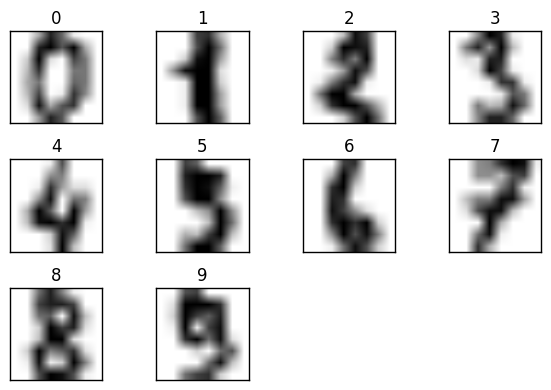

In [18]:
digits = datasets.load_digits()

X= digits.data
y = digits.target

for i in range(0,10):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i].reshape((8,8)),cmap=plt.cm.binary)
    plt.xticks([]); plt.yticks([]); plt.title(i)
plt.tight_layout()
plt.show()

The input and output layers of our neural net are dictated by our data. Each training example has 8x8=64 features so our input layer must have 64 nodes, one for each input feature. We would like to distinguish between 10 classes (0,1,2,3,4,5,6,7,8,9) so our output layer must have 10 nodes. Each output node will describe the probability our input features belong to each one of the 10 possible classes. The rest of the network architecture is a hyperparameter, the number of 'hidden' layers, nodes in each layer, and form of the activation function, and the type of regularization is entirely up to us! Lets try a neural network that will have a single hidden layer with 20 nodes. In sklearn we specify this network via the hidden_layer_sizes paramter like so: 

In [53]:
from sklearn import neural_network, model_selection
nn = neural_network.MLPClassifier(hidden_layer_sizes=(25,), max_iter=500)

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                            X,
                            y, test_size = .2, stratify=y )

In [55]:
#Call the fit method on the trianing set
nn.fit(X_train, y_train)

#Call the score method on the test set
score = nn.score(X_test, y_test)

print("Score is: %.3f"%(score))

Score is: 0.956


To make sure we understand whats going on here lets take a look at a random test exampe in detail.

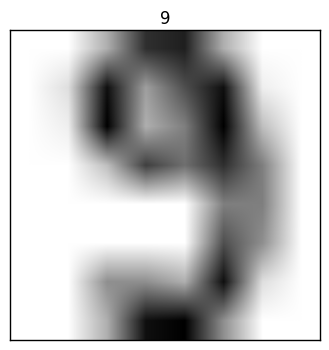

In [65]:
test_example = 20

plt.imshow(X_test[test_example].reshape((8,8)), cmap=plt.cm.binary)
plt.title(y_test[test_example]); plt.xticks([]); plt.yticks([])
plt.show()

The model assigns the following probabilities for each class:

In [66]:
probs = nn.predict_proba([X_test[test_example]])
print(probs)

[[  8.42092210e-04   1.08508765e-10   5.13051964e-08   1.37145889e-07
    9.26333963e-11   2.42523891e-09   2.94471005e-11   4.32652183e-07
    2.09461771e-04   9.98947822e-01]]


In [67]:
print("Our model assigns the following probability to each class:")
for i,v in enumerate(probs[0]):
    print("Class %i:\t%.5f"%(i,v))

Our model assigns the following probability to each class:
Class 0:	0.00084
Class 1:	0.00000
Class 2:	0.00000
Class 3:	0.00000
Class 4:	0.00000
Class 5:	0.00000
Class 6:	0.00000
Class 7:	0.00000
Class 8:	0.00021
Class 9:	0.99895
